In [1]:
# importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# loading the dataset
df = pd.read_csv('data/loan.csv')

print ('the first five rows are: \n', df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'data/loan.csv'

In [ ]:
# checking the dimensions of the dataset
df.shape

(614, 12)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


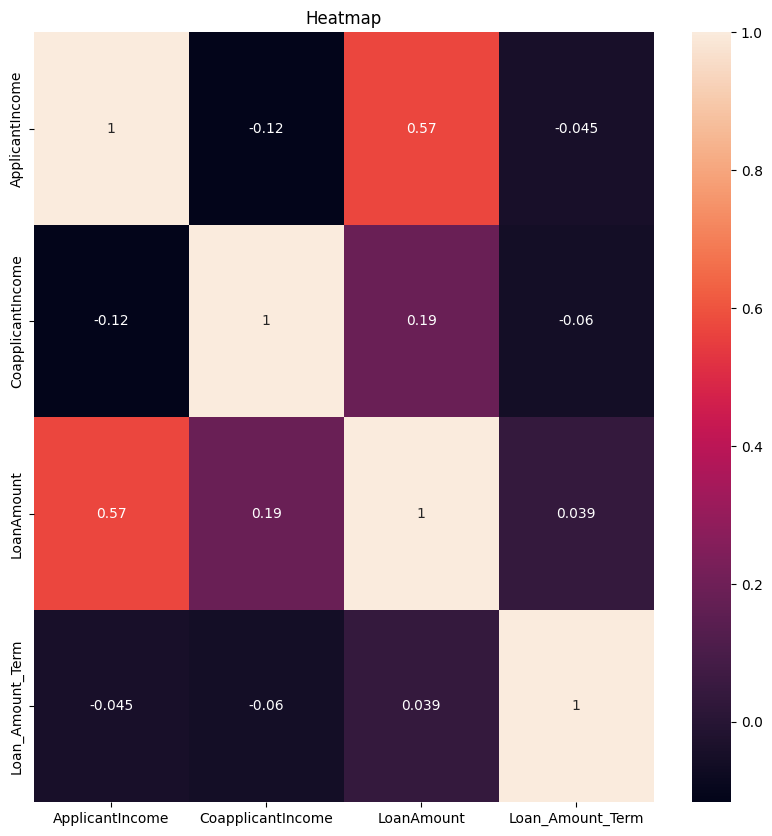

In [ ]:
# DATA VISUALIZATION
# heatmap to show the correlation between numeric features
def heatmap(df, col):
    plt.figure(figsize = (10, 10))
    sns.heatmap(df[col].corr(), annot=True)
    plt.title('Heatmap')
    plt.show()
    
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

heatmap(df, numeric_features)

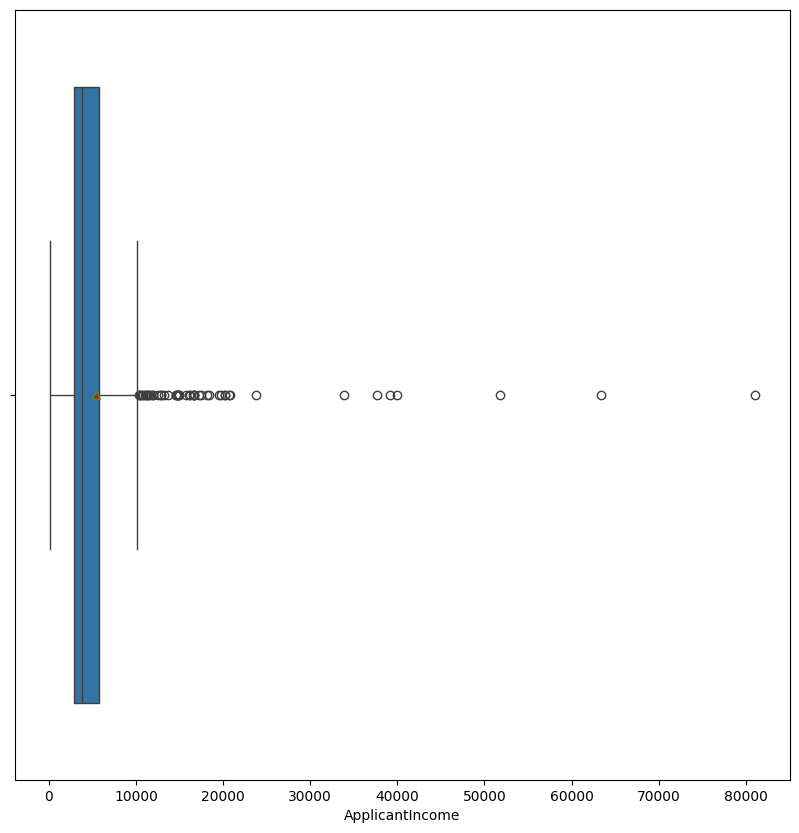

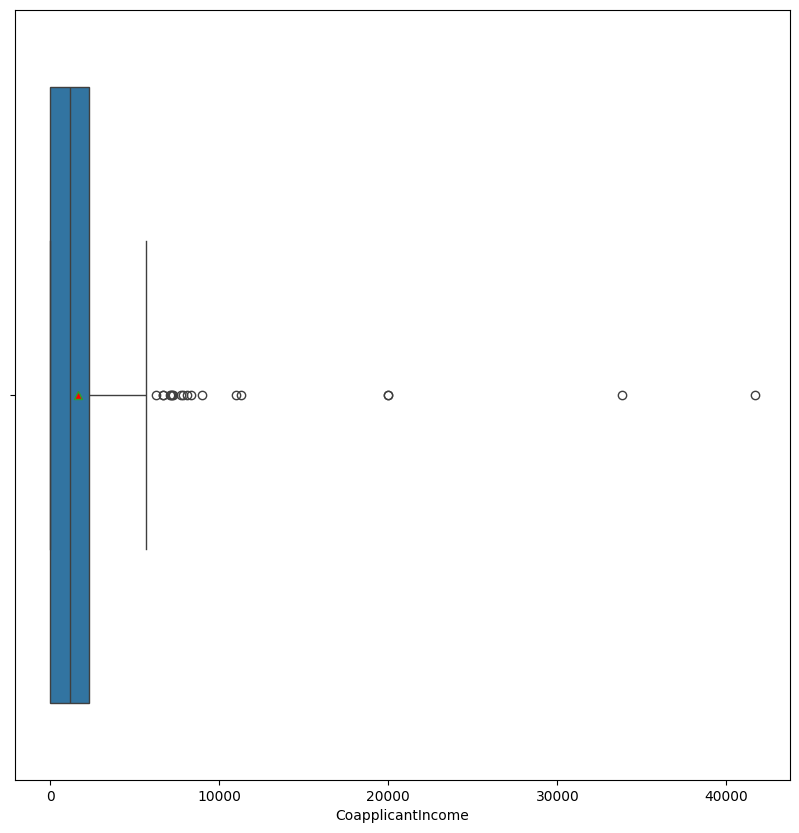

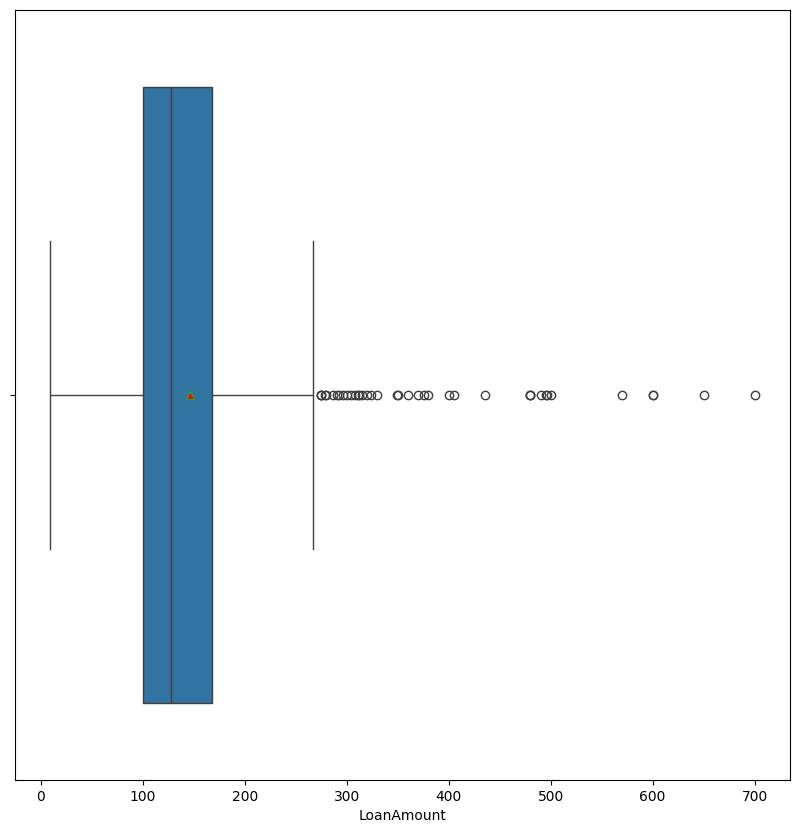

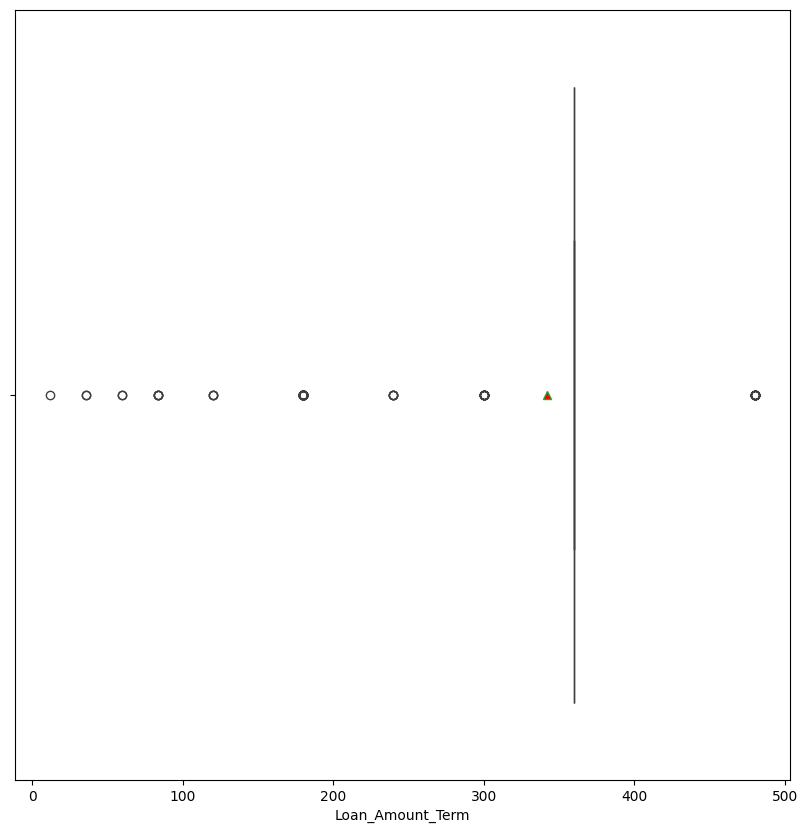

In [ ]:
# boxplot to visualize outliers and data distribution in numeric features
def boxplot(df, col):
    plt.figure(figsize = (10,10))
    sns.boxplot(x = col, data = df, showmeans=True, meanprops={"markerfacecolor":"red"})
    plt.show()

for col in numeric_features:
    boxplot(df, col)

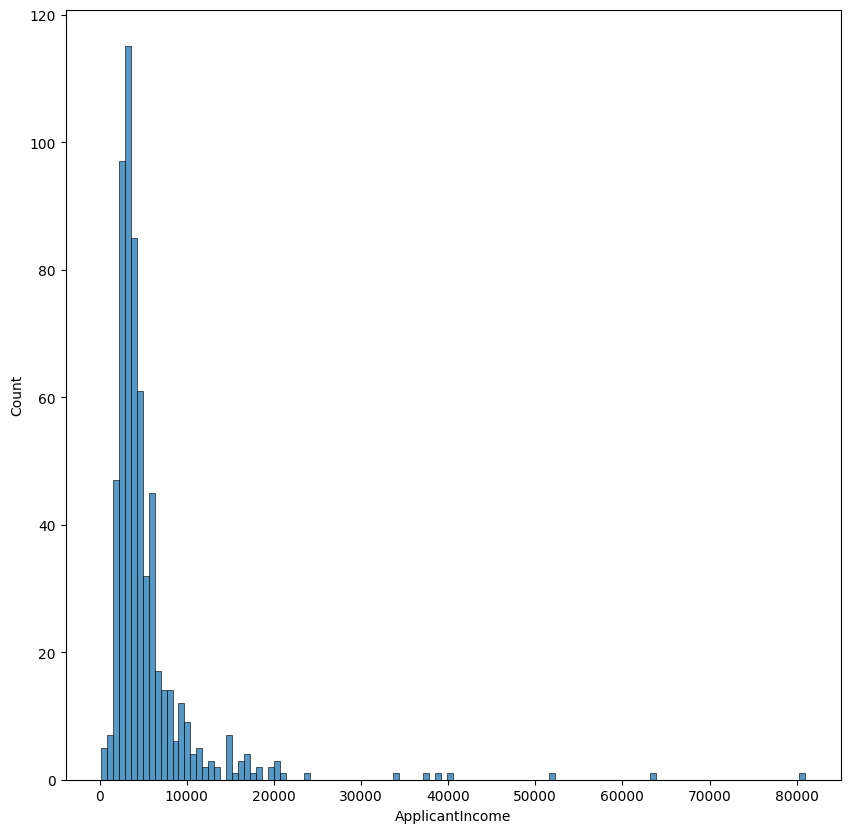

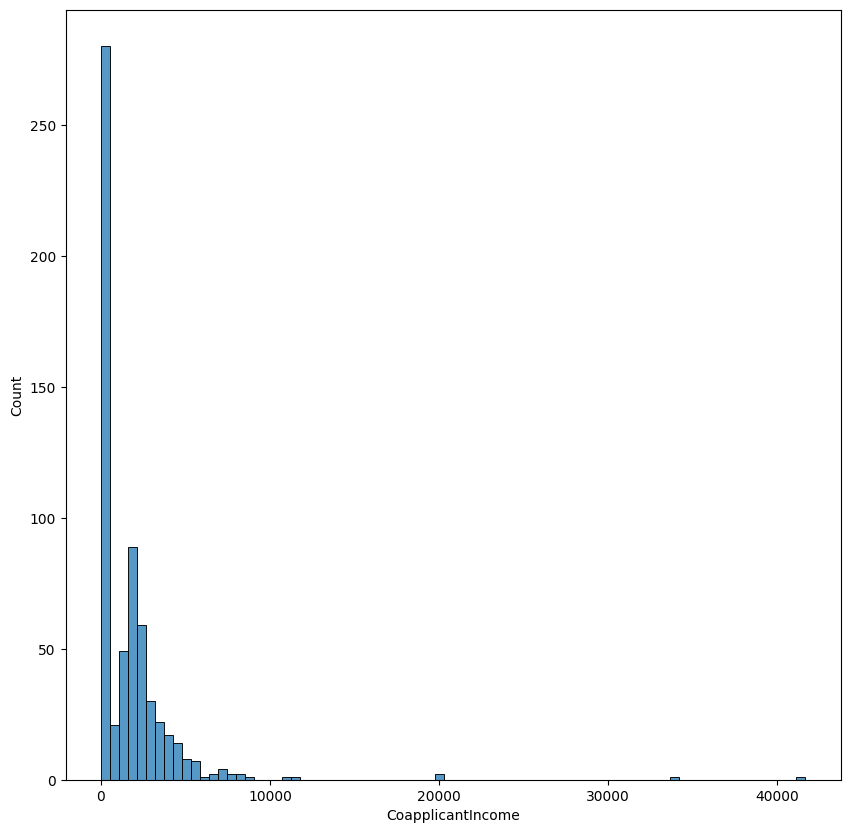

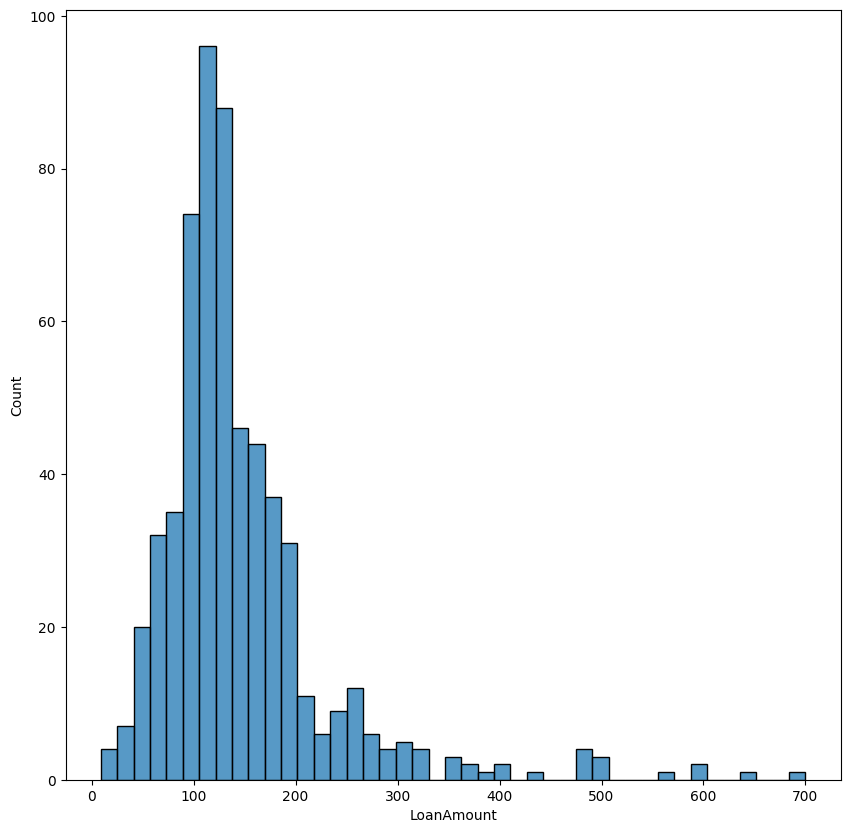

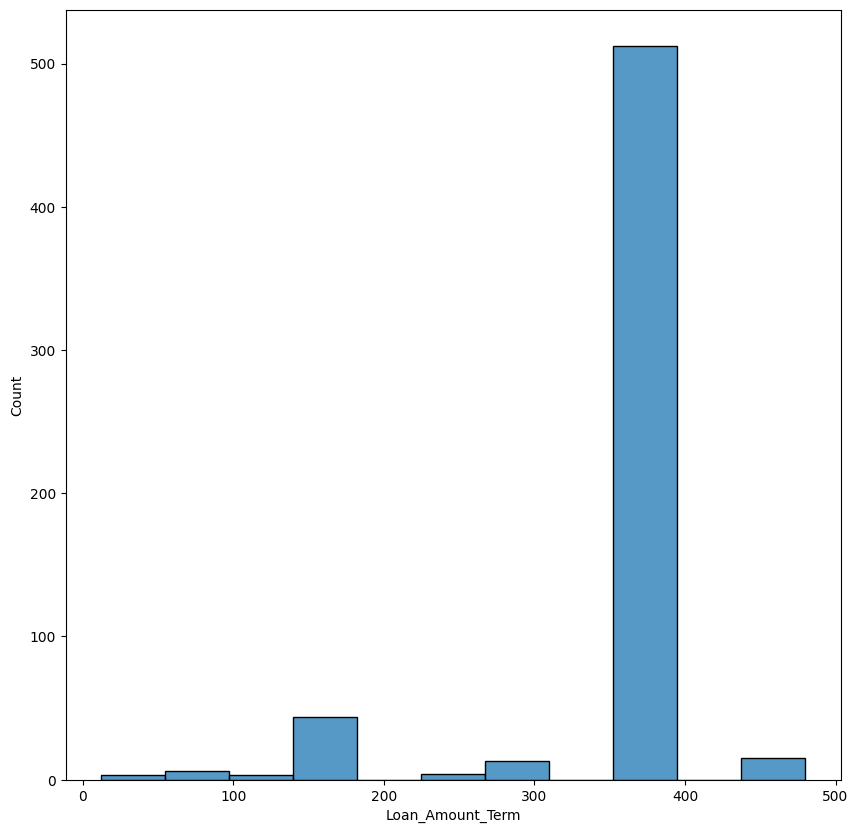

In [ ]:
# histogram to visualize numeric data distribution
def histogram(df, col):
    plt.figure(figsize = (10, 10))
    sns.histplot(data = df, x = col)
    plt.show()
    
for col in numeric_features:
    histogram(df, col)

In [ ]:
# turning credit_history into a categorical feature to visualize in a barchart
mapping = {1: 'good credit', 0: 'bad credit'}
df['Credit_History'] = df['Credit_History'].map(mapping)

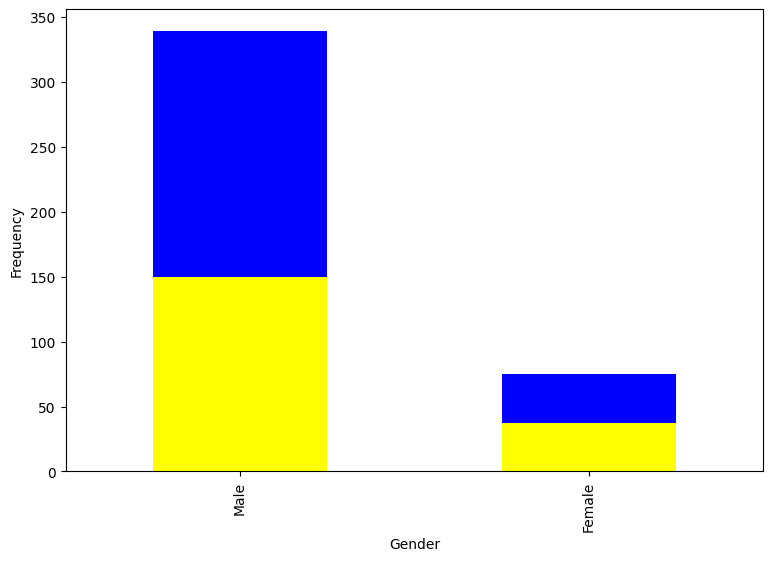

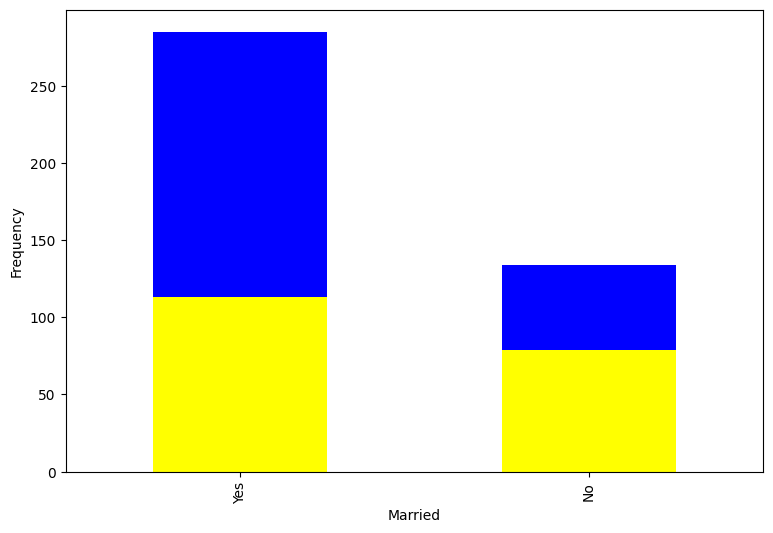

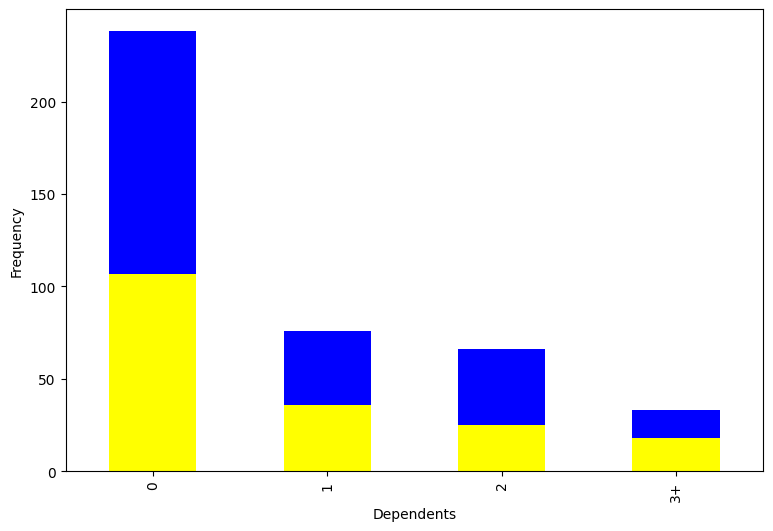

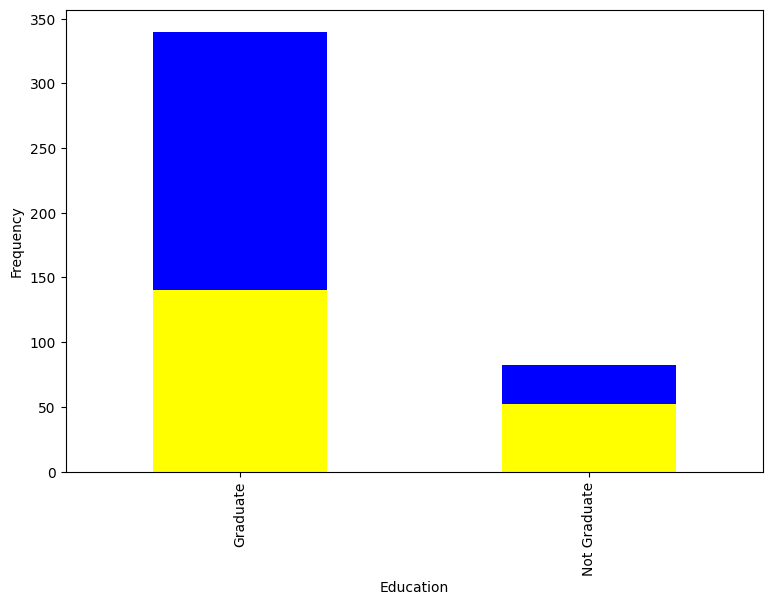

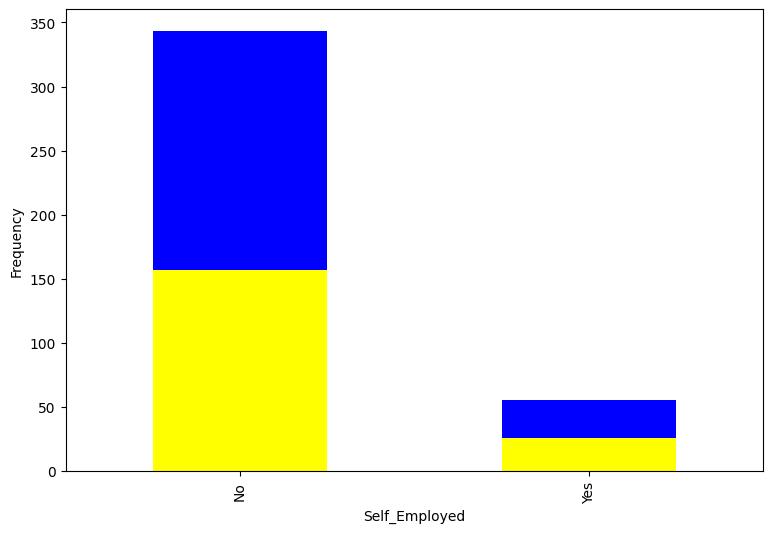

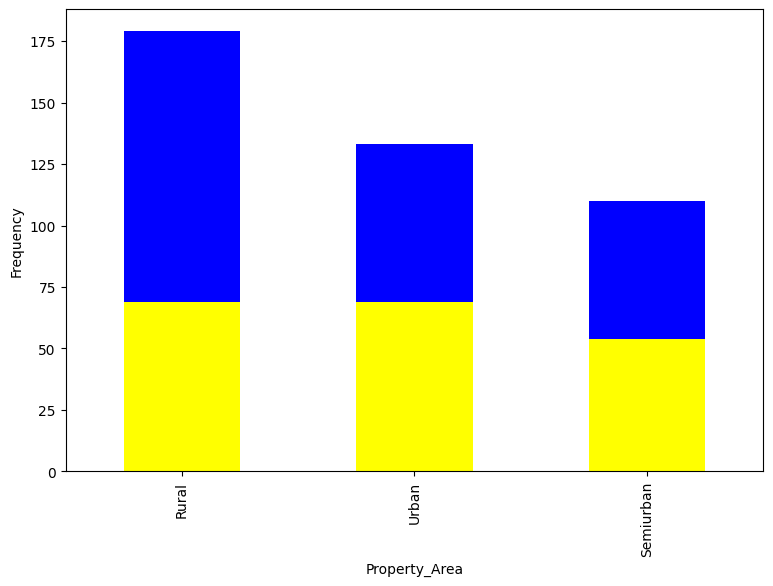

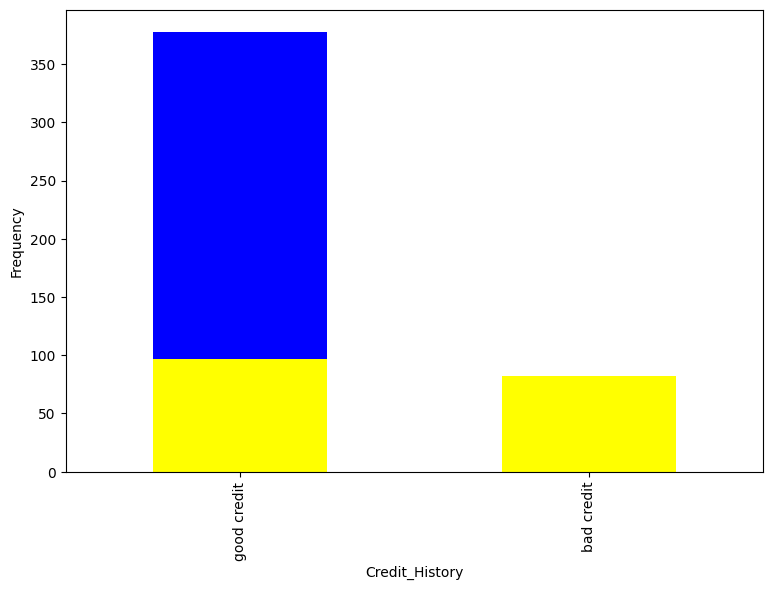

In [ ]:
# barchart to compare and visualize categorical data
def barchart(df, col):
    approved_counts = df[df['Loan_Status'] == 'Y'][col].value_counts()
    denied_counts = df[df['Loan_Status'] == 'N'][col].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    approved_counts.plot.bar(ax = ax, color='blue')
    denied_counts.plot.bar(ax = ax, color='yellow')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

for col in categorical_features:
    barchart(df, col)

In [ ]:
# PREPROCESSING
# checking the number of unique values in each column to determine which are categorical or continuous
print(df.nunique())

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


In [ ]:
# separating categorical and continuous data
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_data = df[categorical_features]
continuous_data = df[continuous_features]

In [ ]:
# calculating mean and standard deviation 
mean = df['ApplicantIncome'].mean()
std_dev = df['ApplicantIncome'].std()

# Define threshold (e.g., 3 standard deviations)
threshold = 3 * std_dev

# Remove outliers
df = df[df['ApplicantIncome'].abs() < threshold]

In [ ]:
# calculating mean and standard deviation 
mean = df['LoanAmount'].mean()
std_dev = df['LoanAmount'].std()

# Define threshold (e.g., 3 standard deviations)
threshold = 3 * std_dev

# Remove outliers
df = df[df['LoanAmount'].abs() < threshold]


In [ ]:
# checking the duplicated rows
duplicate_rows = df[df.duplicated()]
if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [ ]:
# checking number of missing values
missingValue = df.isnull().sum()
print('missing values are: \n', missingValue, "\n")

missing values are: 
 Gender                8
Married               2
Dependents           12
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       34
Property_Area         0
Loan_Status           0
dtype: int64 



In [ ]:
# imputing categorical values with mode
categorical_features_with_missing_values = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

for feature in categorical_features_with_missing_values:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)

In [ ]:
# imputing numeric features with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['LoanAmount'].mean(),inplace=True)


In [ ]:
missingValue = df.isnull().sum()
print(missingValue, "\n")

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 



In [ ]:
# scaling numeric features
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# encoding categorical features
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['N', 'Y'])

# encoding categorical features individually
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [ ]:
# splitting the training and test set
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# initializing logistic regression model
logistic_model = LogisticRegression()

# fitting the model on the training data
logistic_model.fit(X_train, y_train)

# predicting on the test set
predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print('Logistic Regression Model Metrics:')
print('Accuracy: ', accuracy)
print('Percision: ', precision)
print('Recall: ', recall)
print('Confusion Matrix:')
print(cm_rf)

Logistic Regression Model Metrics:
Accuracy:  0.8615384615384616
Percision:  0.8421052631578947
Recall:  1.0
Confusion Matrix:
[[ 17  23]
 [  8 105]]


In [ ]:
# initializing Random Forest classifier
random_forest_model = RandomForestClassifier()

# fitting the model on the training data
random_forest_model.fit(X_train, y_train)

# predicting on the test set
predictions_rf = random_forest_model.predict(X_test)

# calculating metrics for Random Forest model
accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)
cm_rf = confusion_matrix(y_test, predictions_rf)

print('Random Forest Model Metrics:')
print('Accuracy: ', accuracy_rf)
print('Precision: ', precision_rf)
print('Recall: ', recall_rf)
print('Confusion Matrix: ')
print(cm_rf)

Random Forest Model Metrics:
Accuracy:  0.7973856209150327
Precision:  0.8203125
Recall:  0.9292035398230089
Confusion Matrix: 
[[ 17  23]
 [  8 105]]


In [ ]:
from sklearn.svm import SVC

# initializing SVM classifier
svm_model = SVC()

# fitting the SVM model on the training data
svm_model.fit(X_train, y_train)

# predicting on the test set using SVM
predictions_svm = svm_model.predict(X_test)

# calculating metrics for SVM model
accuracy_svm = accuracy_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm)
recall_svm = recall_score(y_test, predictions_svm)
cm_svm = confusion_matrix(y_test, predictions_svm)

print('SVM Model Metrics:')
print('Accuracy: ', accuracy_svm)
print('Precision: ', precision_svm)
print('Recall: ', recall_svm)
print('Confusion Matrix: ')
print(cm_svm)

SVM Model Metrics:
Accuracy:  0.8235294117647058
Precision:  0.8208955223880597
Recall:  0.9734513274336283
Confusion Matrix: 
[[ 16  24]
 [  3 110]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# initializing Naive Bayes classifier
naive_bayes_model = GaussianNB()

# fitting the Naive Bayes model on the training data
naive_bayes_model.fit(X_train, y_train)

# predicting on the test set using Naive Bayes
predictions_nb = naive_bayes_model.predict(X_test)

# calculating metrics for Naive Bayes model
accuracy_nb = accuracy_score(y_test, predictions_nb)
precision_nb = precision_score(y_test, predictions_nb)
recall_nb = recall_score(y_test, predictions_nb)
cm_nb = confusion_matrix(y_test, predictions_nb)

print('Naive Bayes Model Metrics:')
print('Accuracy: ', accuracy_nb)
print('Precision: ', precision_nb)
print('Recall: ', recall_nb)
print('Confusion Matrix: ')
print(cm_nb)

Naive Bayes Model Metrics:
Accuracy:  0.8235294117647058
Precision:  0.8257575757575758
Recall:  0.9646017699115044
Confusion Matrix: 
[[ 17  23]
 [  4 109]]
